In [2]:
# 平均誤差エントロピーの微分
import numpy as npy
import matplotlib.pyplot as plt
%matplotlib inline

# ロジスティック関数
def logistic(x,w):
    y = 1 / (1 + npy.exp(-(w[0]*x + w[1])))
    return y

# 偏微分後の式
def dcee_logistic(w,x,t):
    # ロジスティック関数を適用する
    y = logistic(x,w)
    # 返却値
    dcee = npy.zeros(2)
    # データの数だけループする
    for num in range(len(y)):
        # w0の偏微分式
        dcee[0] = dcee[0]+(y[num]- t[num])*x[num]
        # w1の偏微分式
        dcee[1] = dcee[1]+(y[num]- t[num])
    # 偏微分により算出した値の平均をとる
    dcee = dcee / X_n
    return dcee

# データセットの取り出し
sample_data = npy.load('classdata1.npz')
X_n = sample_data['X_n']
X = sample_data['X']
T = sample_data['Y']

W=[1,1]
result = dcee_logistic(W, X, T)

print(result)


[129.79310345   0.62068966]


w0=-0.07,w1=11.89
CEE=0.22
Bounday=180.50 g


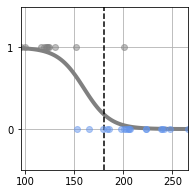

In [11]:
# 勾配法によるパラメータの算出
import numpy as npy
import matplotlib.pyplot as plt
from scipy.optimize import minimize
%matplotlib inline

# ロジスティック関数
def logistic(x,w):
    y = 1 / (1 + npy.exp(-(w[0]*x + w[1])))
    return y

# ロジスティック関数の描写
def show_logistic(w):
    xb = npy.linspace(X_min, X_max, 100)
    y = logistic(xb, w)
    plt.plot(xb,y,color='gray',linewidth=4)
    # 決定境界
    i = npy.min(npy.where(y > 0.5))
    B = (xb[i -1] + xb[i])/2
    plt.plot([B, B], [-.5, 1.5],color='k',linestyle='--')
    plt.grid(True)
    return B

# データ分布表示関数
def show_data(x,t):
    K = npy.max(t) + 1
    for k in range(K):
        plt.plot(x[t == k], t[t == k], X_col[k],alpha=0.5, linestyle='none',marker='o')
    plt.grid(True)
    plt.ylim(-.5, 1.5)
    plt.xlim(X_min, X_max)
    plt.yticks([0,1])

# 平均交差エントロピー誤差
def cee_logistic(w,x,t):
    y = logistic(x,w)
    cee = 0
    for n in range(len(y)):
        cee = cee -(t[n]*npy.log(y[n]) + (1 - t[n]) * npy.log(1 - y[n]))
    cee = cee / X_n
    return cee

# 偏微分後の式
def dcee_logistic(w,x,t):
    # ロジスティック関数を適用する
    y = logistic(x,w)
    # 返却値
    dcee = npy.zeros(2)
    # データの数だけループする
    for num in range(len(y)):
        # w0の偏微分式
        dcee[0] = dcee[0]+(y[num]- t[num])*x[num]
        # w1の偏微分式
        dcee[1] = dcee[1]+(y[num]- t[num])
    # 偏微分により算出した値の平均をとる
    dcee = dcee / X_n
    return dcee

def fit_logistic(w_init, x, t):
    result = minimize(cee_logistic, w_init, args=(x,t), jac=dcee_logistic,method="CG")
    return result.x

# データ生成
# データセットの取り出し
sample_data = npy.load('classdata1.npz')
X_min = sample_data['X_min']
X_max = sample_data['X_max']
X_n = sample_data['X_n']
X = sample_data['X']
T = sample_data['Y']
X_col = ['cornflowerblue','gray']

plt.figure(1,figsize=(3,3))
W_init = [0.14,-25]
W = fit_logistic(W_init, X, T)
print("w0={0:.2f},w1={1:.2f}".format(W[0],W[1]))

B=show_logistic(W)
show_data(X,T)
plt.ylim(-.5, 1.5)
plt.xlim(X_min, X_max)
cee = cee_logistic(W,X,T)
print("CEE={0:.2f}".format(cee))
print("Bounday={0:.2f} g".format(B))
plt.show()
